c:\Users\trzci\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


Epoch 0 of 1000
Epoch loss: 0.0925969362810806
Epoch 1 of 1000
Epoch loss: 0.07653816913565
Epoch 2 of 1000
Epoch loss: 0.06891807127330038
Epoch 3 of 1000
Epoch loss: 0.06594844314235228
Epoch 4 of 1000
Epoch loss: 0.06521566294961506
Epoch 5 of 1000
Epoch loss: 0.06438413262367249
Epoch 6 of 1000
Epoch loss: 0.06358437529868549
Epoch 7 of 1000
Epoch loss: 0.06296274093566118
Epoch 8 of 1000
Epoch loss: 0.06241055660777622
Epoch 9 of 1000
Epoch loss: 0.06197385241587957
Epoch 10 of 1000
Epoch loss: 0.06164956272200302
Epoch 11 of 1000
Epoch loss: 0.061365132254582865
Epoch 12 of 1000
Epoch loss: 0.061063042393437135
Epoch 13 of 1000
Epoch loss: 0.061042734456283075
Epoch 14 of 1000
Epoch loss: 0.06036478736334377
Epoch 15 of 1000
Epoch loss: 0.05885924219533249
Epoch 16 of 1000
Epoch loss: 0.05497567507403868
Epoch 17 of 1000
Epoch loss: 0.05192616850965553
Epoch 18 of 1000
Epoch loss: 0.04670502266122235
Epoch 19 of 1000
Epoch loss: 0.04459573266406854
Epoch 20 of 1000
Epoch loss: 0.

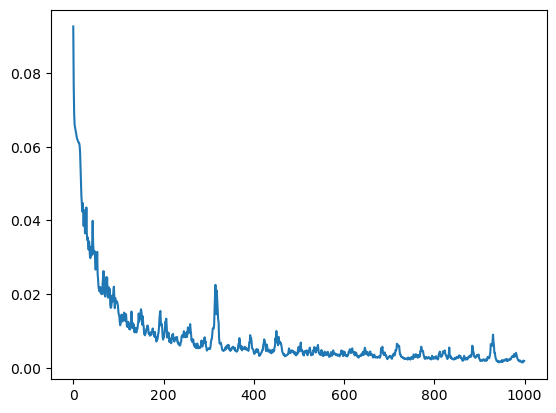

R^2 tensor(0.9573)


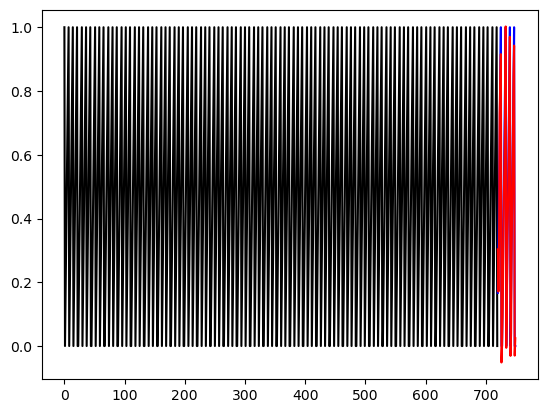

R^2 tensor(0.1777)


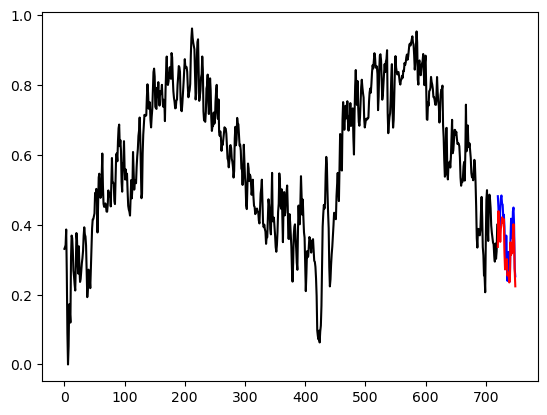

R^2 tensor(-1.3564)


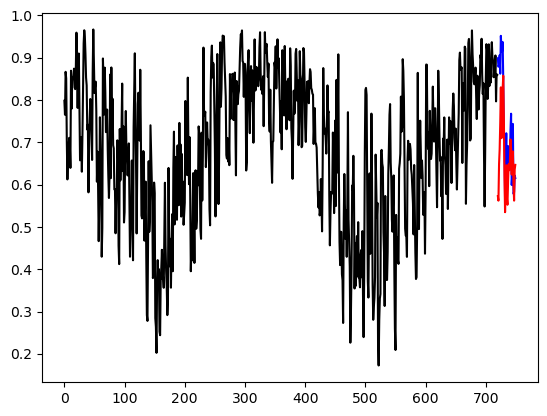

R^2 tensor(0.7287)


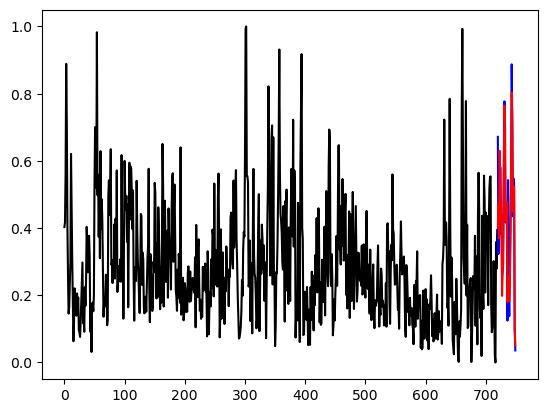

R^2 tensor(0.7419)


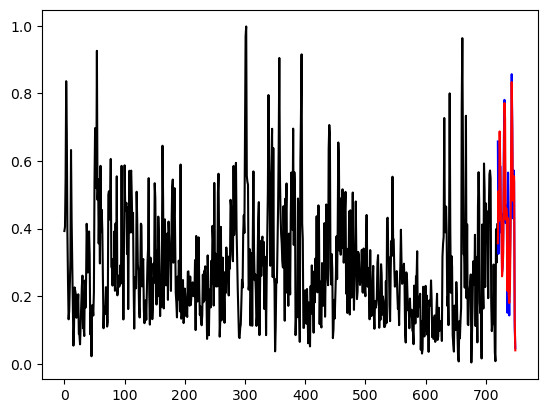

R^2 tensor(0.5716)


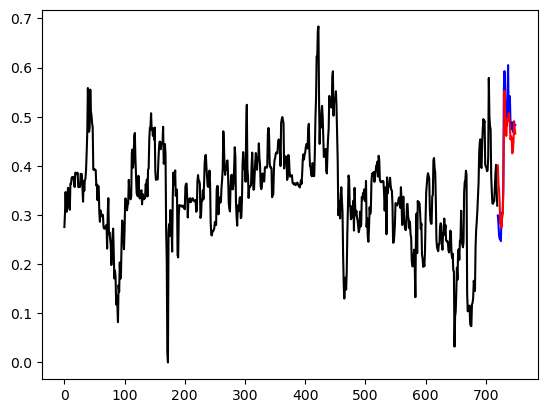

R^2 tensor(0.3093)


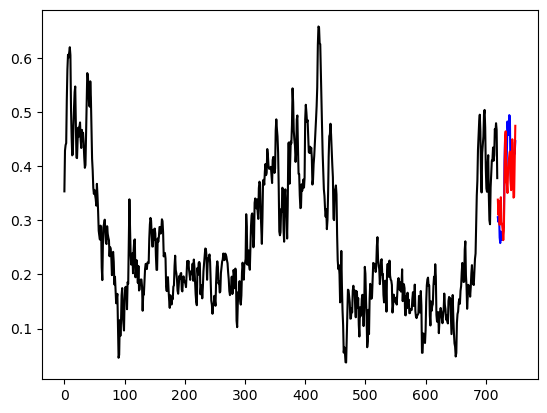

R^2 tensor(0.6550)


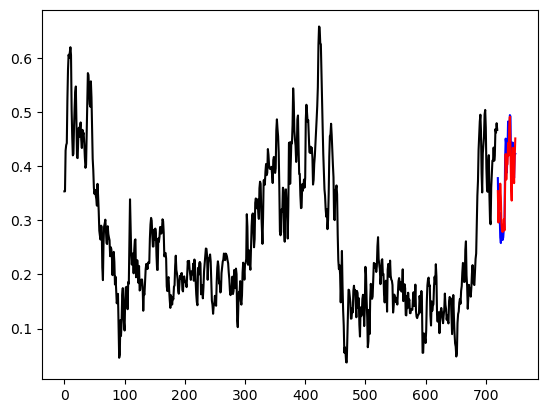

R^2 tensor(0.6216)


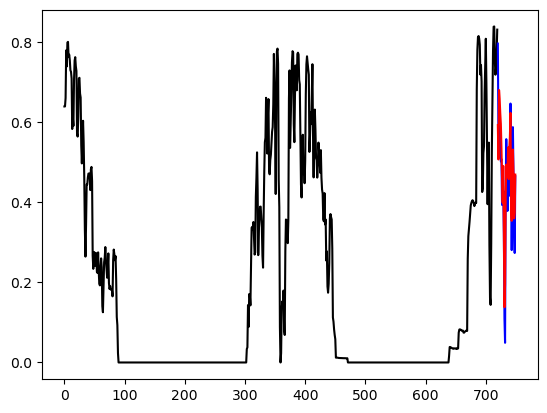

R^2 tensor(0.5867)


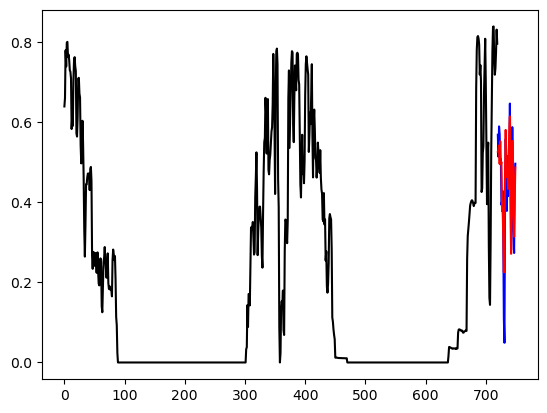

R^2 tensor(0.4515)


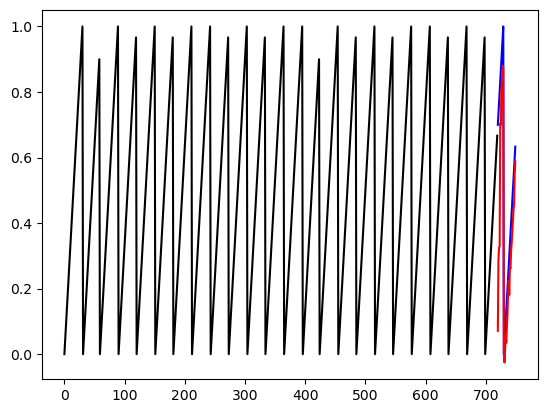

R^2 tensor(0.4722)


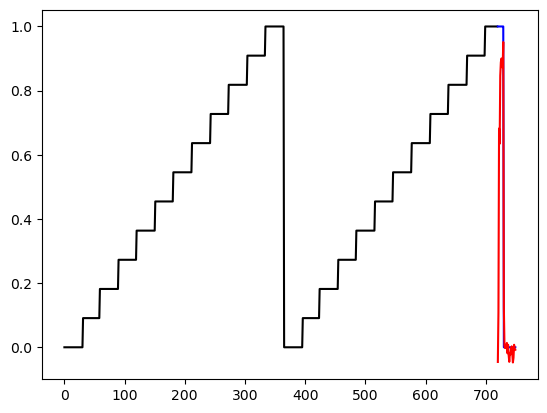

R^2 tensor(-1.5687)


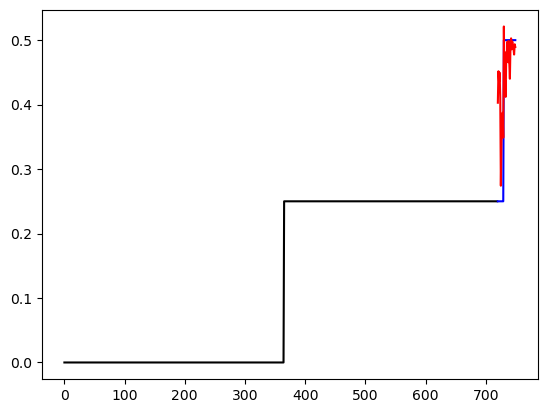

In [1]:
import pandas as pd

import torch
from torch import nn
from torch import Tensor
import math
import configparser
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch import cuda
import series_transformer as st

dataset = st.CustomDataSet('Avg_data.csv',window_length=720,prediction_window=30)

params = st.ParameterProvider("series.config")
t1 = st.Transformer(params)
device_id = torch.cuda.current_device()
t1.cuda(device_id)
train_dataset, test_dataset = dataset.getSets()
_, loss_history = st.train_cuda(t1,train_dataset,device_id,epochs=1000,verbose_delay=-1)
plt.plot(loss_history)
print(loss_history)
plt.show()
for i in range(13):
    st.output_and_show(t1,train_dataset[0][0],train_dataset[0][2],device_id,i)

R^2 tensor(0.9852)


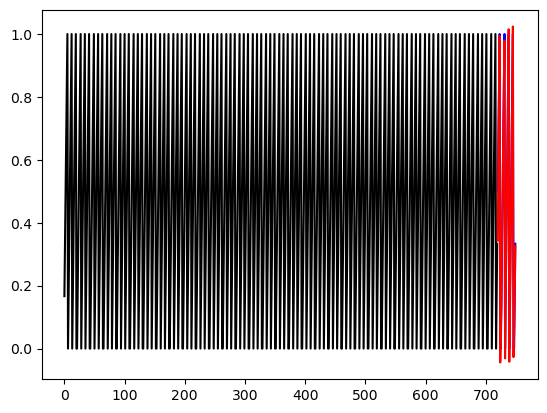

R^2 tensor(0.1915)


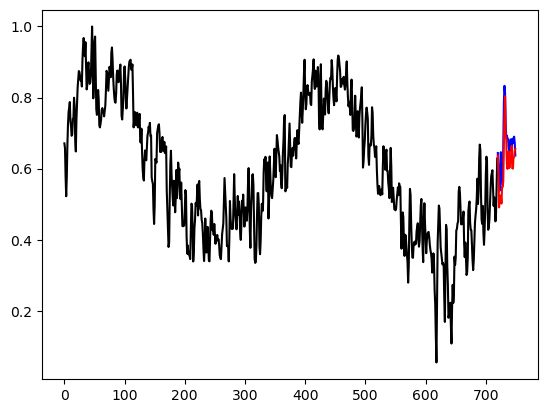

R^2 tensor(0.2356)


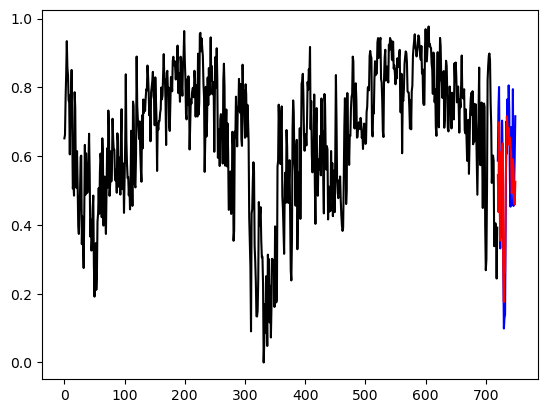

R^2 tensor(0.4066)


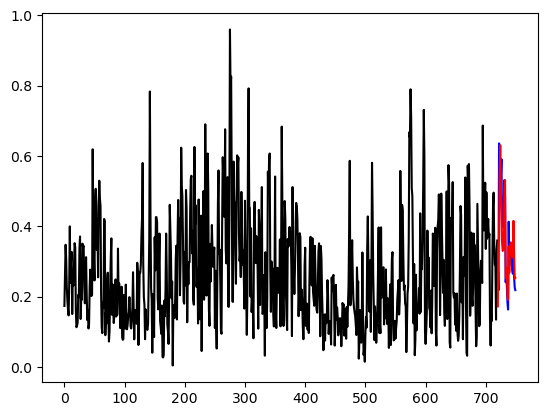

R^2 tensor(0.2472)


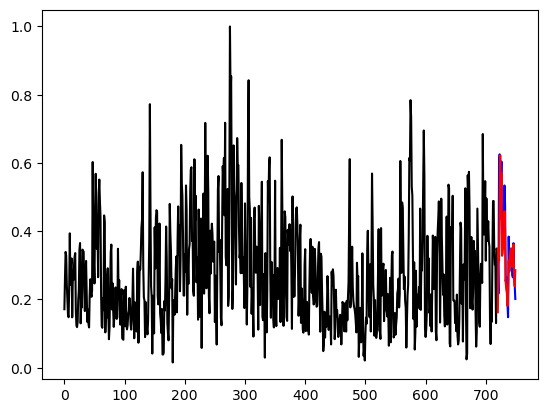

R^2 tensor(-0.0200)


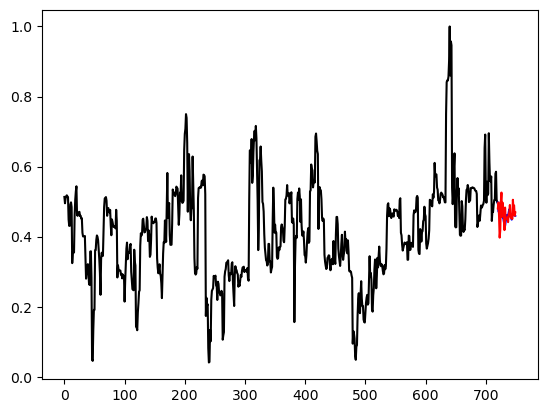

R^2 tensor(-1.0675)


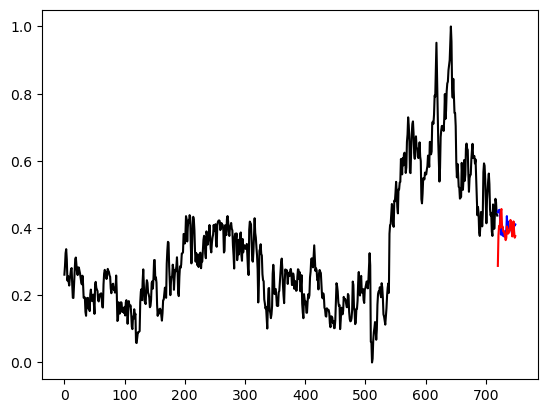

R^2 tensor(-0.9135)


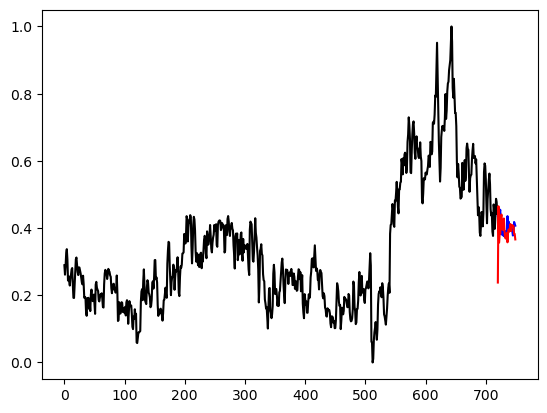

R^2 tensor(-0.4812)


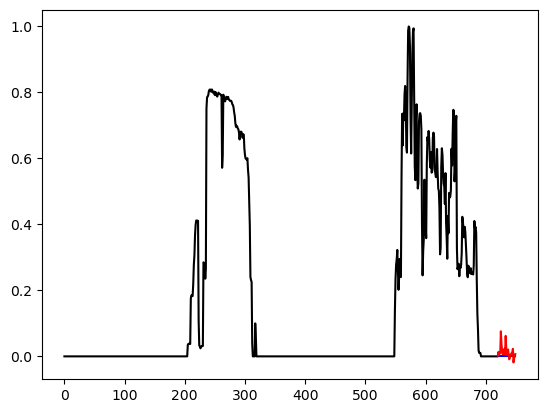

R^2 tensor(-0.1911)


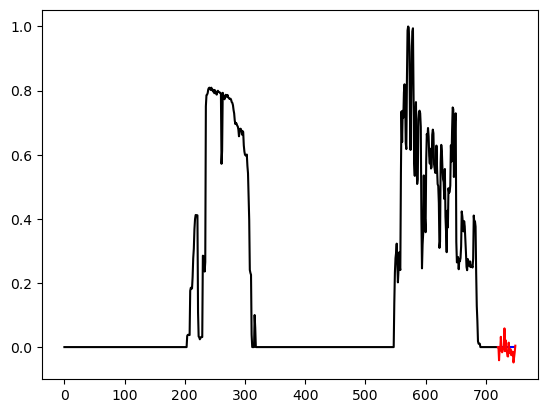

R^2 tensor(0.4986)


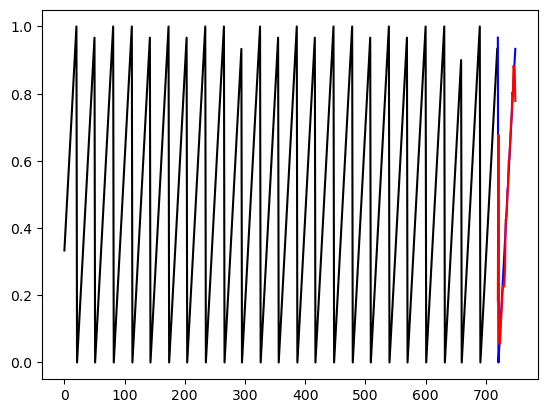

R^2 tensor(-3.1476)


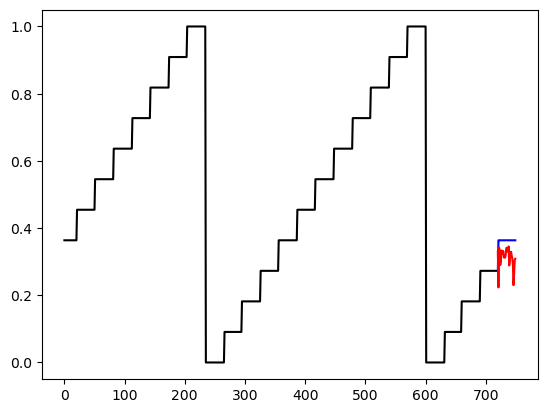

R^2 tensor(-0.2521)


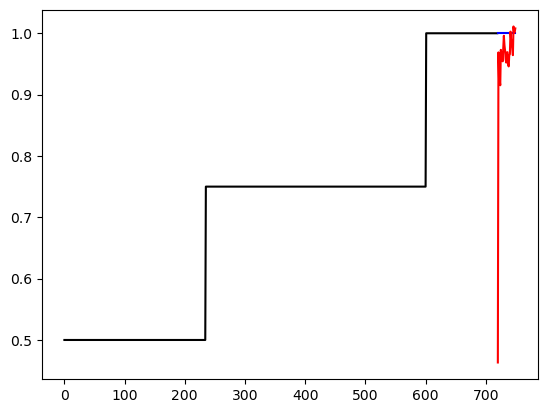

In [2]:
for i in range(13):
    st.output_and_show(t1,test_dataset[-1][0],test_dataset[-1][2],device_id,i)

Day of the week [-],Temp [C],Humidity [%],Wind [m/s],Clouds [1/8],SUM - Entry [GWh/d],SUM - Exit [GWh/d],SUM - Exit t-1d [GWh/d],Storage t-1d [GWh/d],Storage [GWh/d]
